<a href="https://colab.research.google.com/github/MalakSwar/AI_MS2/blob/main/MS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing the dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

#Data link
#https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

df = pd.read_csv('https://raw.githubusercontent.com/MalakSwar/AI_MS2/refs/heads/main/Churn_Dataset.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#2) Data Analysis

Most correlated attributes with Churn:
Churn                                      1.000000
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                     0.008545
MultipleLines_No phone service            -0.011691
MultipleLines_No         

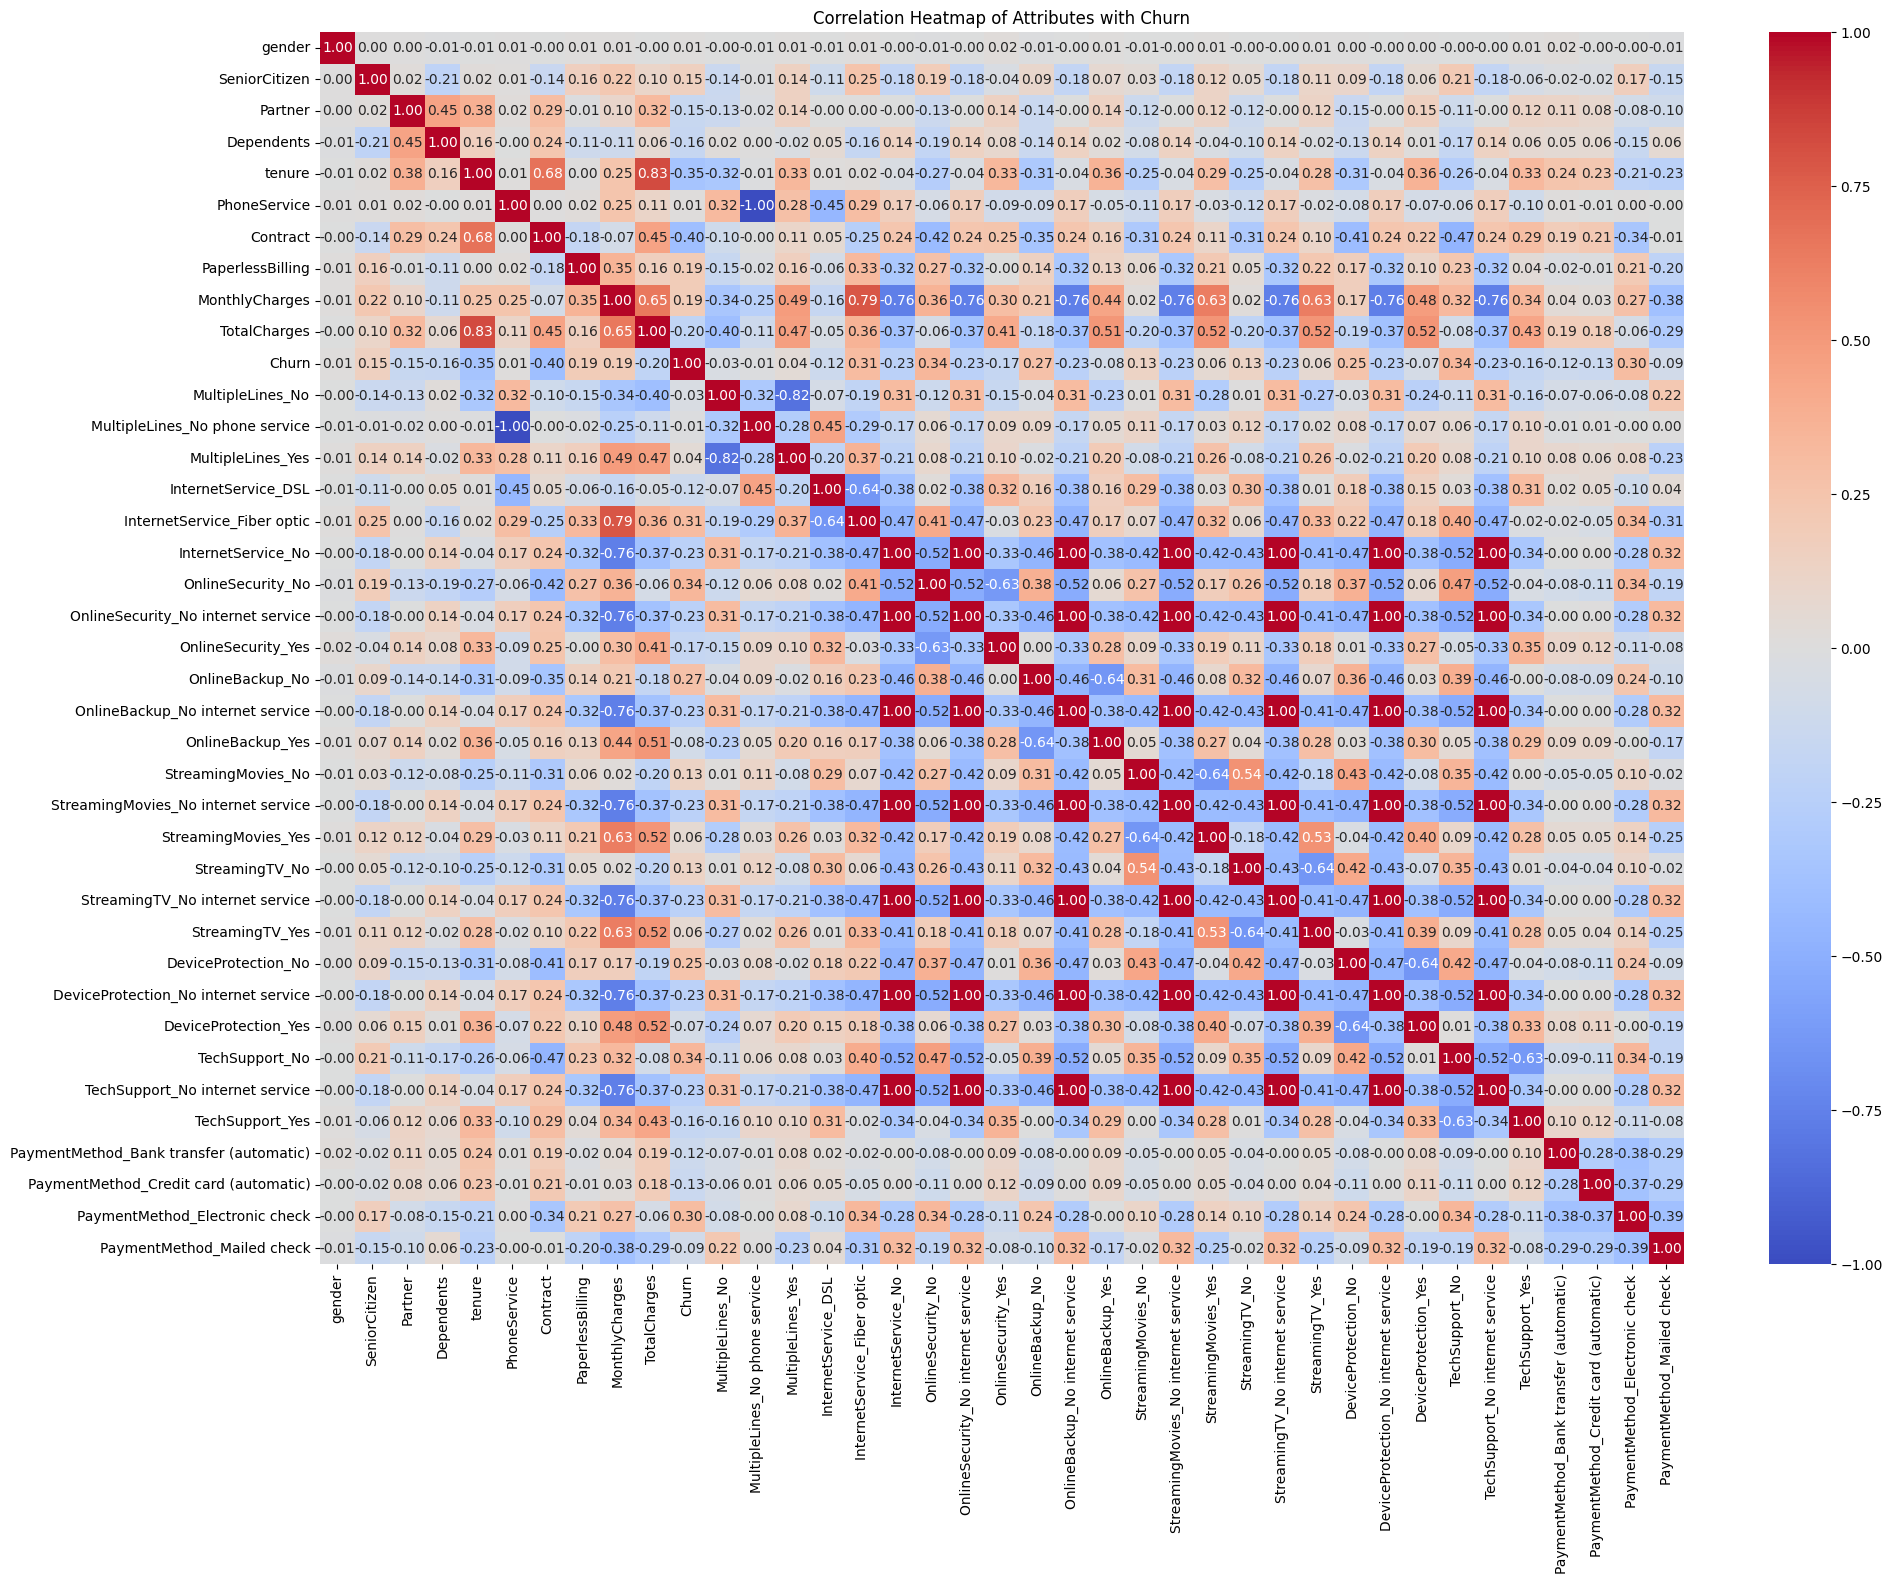

In [11]:
df = df[(df['TotalCharges'] != ' ') & (df['TotalCharges'] != '')].copy()
df['TotalCharges'] = df['TotalCharges'].astype(float)

label_encoding = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in label_encoding:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0).astype(int)

one_hot_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'StreamingMovies', 'StreamingTV', 'DeviceProtection', 'TechSupport',
                  'PaymentMethod']

contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)

one_hot_encoded = pd.get_dummies(df[one_hot_columns], prefix=one_hot_columns)
one_hot_encoded = one_hot_encoded.astype(int)
df= pd.concat([df,one_hot_encoded], axis=1)


df_dropped = df.drop(columns=one_hot_columns)
new_df = df_dropped.select_dtypes(include=['number'])
correlation_matrix = new_df.corr()
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print("Most correlated attributes with Churn:")
print(churn_correlation)
plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Attributes with Churn")
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   object 
 8   InternetService                          7032 non-null   object 
 9   OnlineSecurity                           7032 non-null   object 
 10  OnlineBackup                             7032 non-nul

#Applying Neural Network Model

In [13]:
selected_features = ['tenure', 'Contract']
X = df[selected_features].values
y = df['Churn'].values

scaler = StandardScaler()
X[:, 0] = scaler.fit_transform(X[:, 0].reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7179 - loss: 0.6212 - val_accuracy: 0.7342 - val_loss: 0.5039
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7460 - loss: 0.4823 - val_accuracy: 0.7512 - val_loss: 0.4785
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7512 - loss: 0.4672 - val_accuracy: 0.7512 - val_loss: 0.4779
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7437 - loss: 0.4810 - val_accuracy: 0.7512 - val_loss: 0.4781
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7544 - loss: 0.4766 - val_accuracy: 0.7512 - val_loss: 0.4784
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7529 - loss: 0.4592 - val_accuracy: 0.7512 - val_loss: 0.4785
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7514 - loss: 0.4768 - val_accuracy: 0.7512 - val_loss: 0.4781
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7445 - loss: 0.4718 - val_accuracy: 0.

#Model Evaluation


In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7579 - loss: 0.4672
Test Accuracy: 0.75
